## Machine Learning for Network Intrusion Detection
## Objective
To develop and evaluate a robust machine learning-based classification model capable of identifying and categorizing network traffic as either 'Normal' or 'Attack'. This task is performed using the NSL-KDD dataset, as specified in the assignment prompt 

1. Import Libraries & Dataset
This initial section handles the setup of our environment. We import all necessary Python libraries for data manipulation, visualization, and machine learning. We then load the KDDTrain+.txt dataset with proper error handling and assign the column names based on the provided metadata .

In [47]:
# ===================================================================
# Section 1: Import Libraries and Load Data
# ===================================================================

# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn components for preprocessing and modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import the required classical machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from pandas.io.formats.style import Styler

# Import metrics for performance evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Configure plot styles for better aesthetics
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
print("✅ All required libraries have been successfully imported.")

# --- Load the Dataset ---
# Define column names based on the assignment's metadata
column_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'class', 'difficulty'
]

# Load the dataset with robust error handling
try:
    df = pd.read_csv('KDDTrain+.txt', header=None, names=column_names)
    print(f"✅ Dataset 'KDDTrain+.txt' loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print("❌ FATAL ERROR: 'KDDTrain+.txt' not found.")
    print("Please ensure the dataset file is in the same directory as this notebook to proceed.")
    df = None

✅ All required libraries have been successfully imported.
✅ Dataset 'KDDTrain+.txt' loaded successfully with 125973 rows and 43 columns.


## 2. Data Visualization and Exploration 
This section is dedicated to a thorough exploratory data analysis (EDA). We will perform sanity checks, create insightful visualizations, and analyze feature correlations to understand the dataset's underlying structure, as required by the assignment.

## 2.1. Sanity Check
We begin by printing the first 5 rows to visually inspect the data and ensure it aligns with the feature metadata. We also use 
.info() for a technical summary of data types and null values.

In [48]:
if df is not None:
    print("Printing the first 5 rows for a sanity check:")
    display(df.head())
    
    print("\n" + "="*70)
    print("Technical summary of the dataset:")
    df.info()
else:
    print("⚠️ Cannot proceed: DataFrame not loaded due to previous error.")

Printing the first 5 rows for a sanity check:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21



Technical summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised        

## Observation
The initial check confirms the data has been loaded correctly. We have 125,973 entries and, importantly, no missing values, which simplifies the cleaning process. The features are a mix of numerical (int64, float64) and categorical (object) types, which will require different preprocessing strategies. The target variable is class.

## 2.2. Data Visualizations
We will visualize the distribution of the target class to understand the balance between 'Normal' and 'Attack' traffic. This is a binary classification problem, so all attack types must be grouped into a single 'Attack' category.

/var/folders/mj/h0206rt52sl4rp0bzppmyszm0000gn/T/ipykernel_10649/760418434.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='binary_class', data=df, order=['Normal', 'Attack'], palette='viridis')


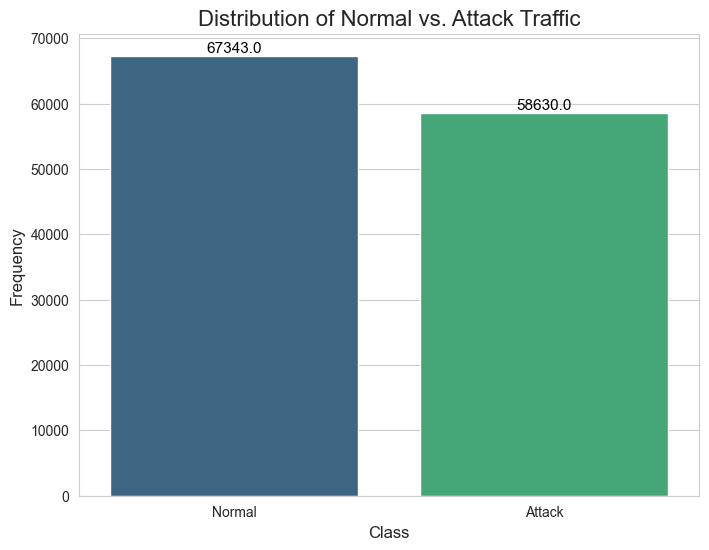

In [49]:
if df is not None:
    # Create a temporary column for clear visualization labels ('Normal' vs 'Attack')
    df['binary_class'] = df['class'].apply(lambda x: 'Attack' if x != 'normal' else 'Normal')
    
    # Visualize the distribution of the target class
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='binary_class', data=df, order=['Normal', 'Attack'], palette='viridis')
    plt.title('Distribution of Normal vs. Attack Traffic', fontsize=16)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    # Add count labels to the bars for clarity
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.show()
    
    # Drop the temporary column
    df = df.drop('binary_class', axis=1)

## Observation
The bar chart clearly shows that the dataset is imbalanced, with 67,343 'Normal' instances versus 58,630 'Attack' instances. This is a critical observation because it means that accuracy alone would be a misleading performance metric. A model that simply guessed 'Normal' every time would still be over 50% accurate. Therefore, we must prioritize metrics like Precision, Recall, and F1-Score for a meaningful evaluation.

## 2.3. Correlational Analysis
We will now analyze the linear relationships between the numerical features and visualize the correlation matrix with a heatmap, as required.

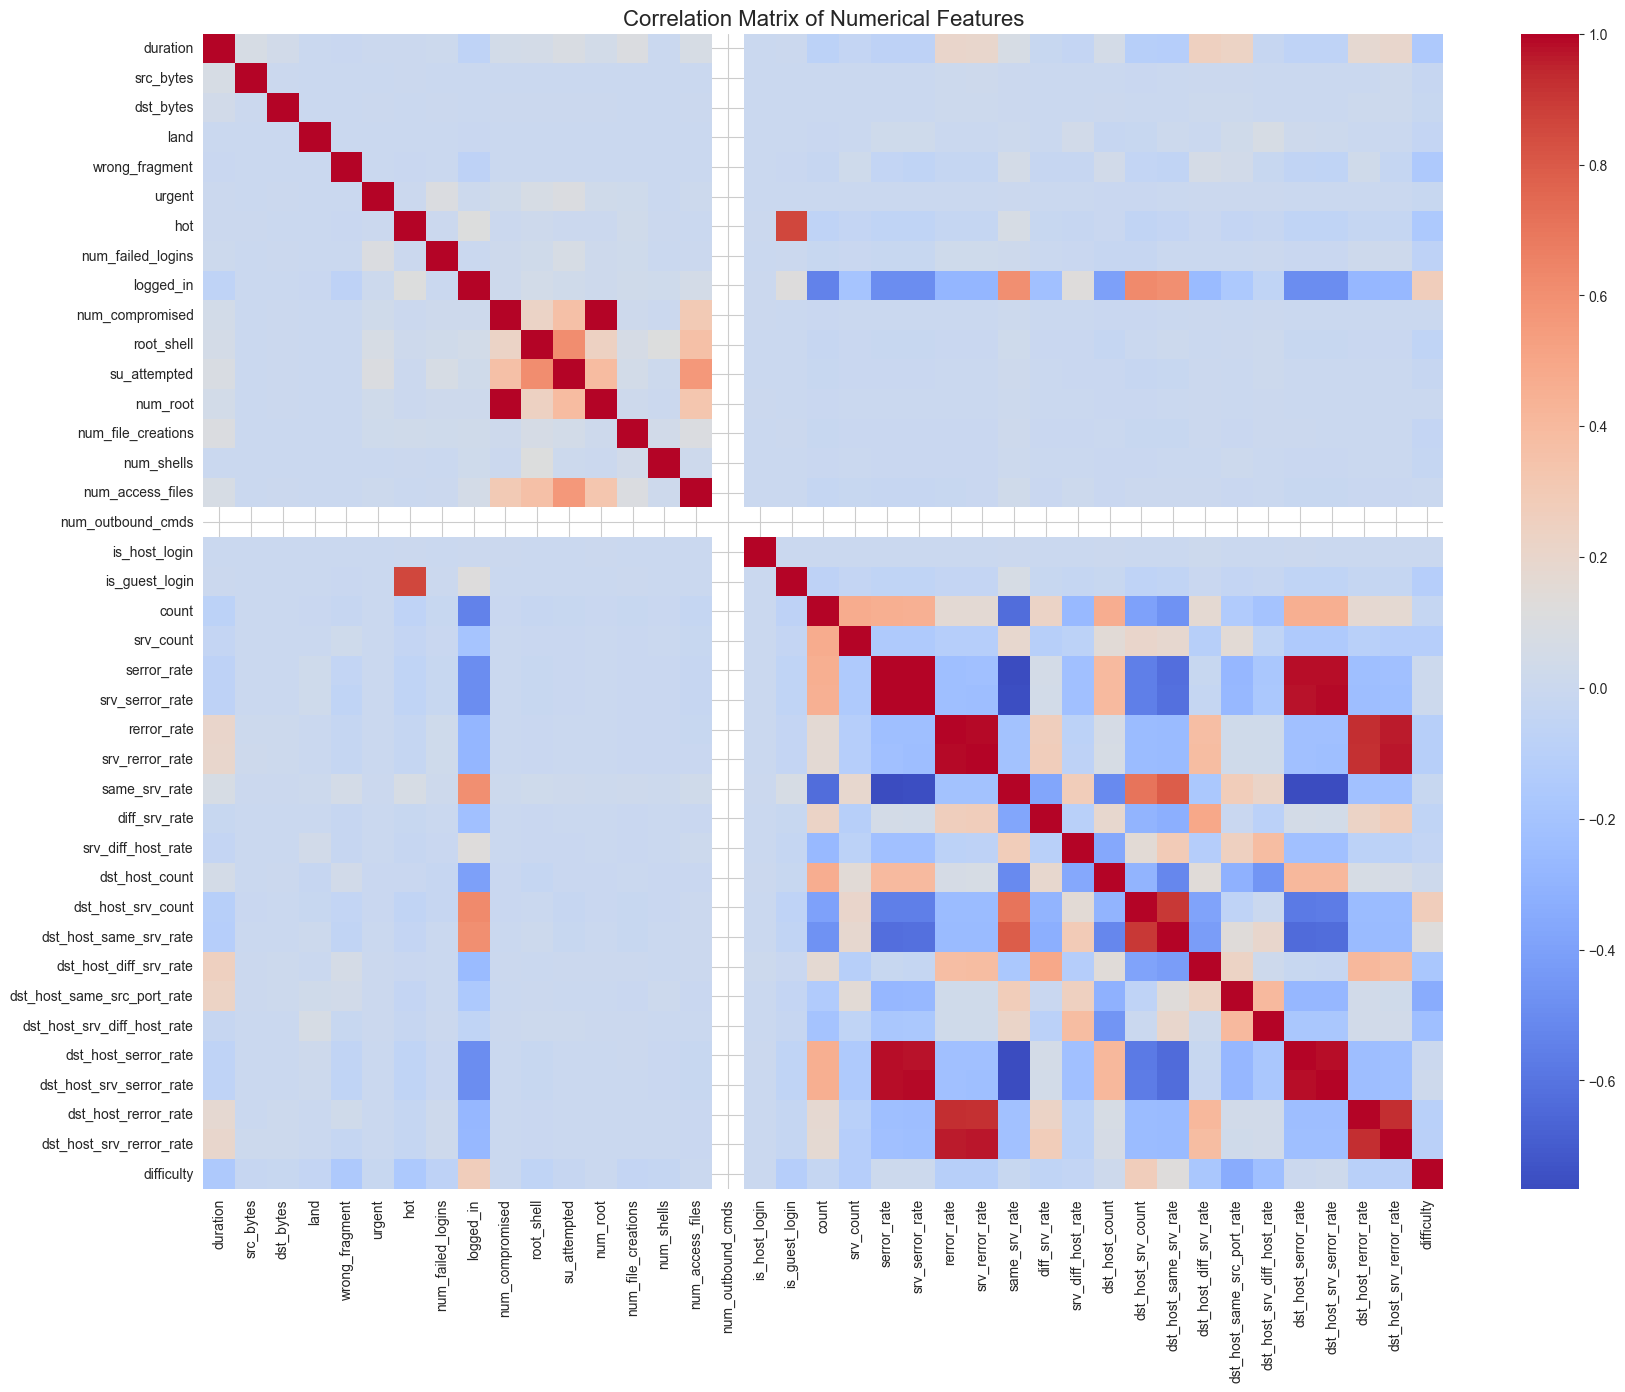

In [50]:
if df is not None:
    # Select only numeric columns for the correlation matrix
    numeric_df = df.select_dtypes(include=np.number)
    corr_matrix = numeric_df.corr()

    # Visualize the correlation matrix
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, cmap='coolwarm')
    plt.title('Correlation Matrix of Numerical Features', fontsize=16)
    plt.show()

Will this correlational analysis have an effect on feature selection? 

## Justification:
Yes, this correlational analysis will have a profound and direct effect on any feature selection strategy, for the following reasons:

## Identification of Redundancy:
 The heatmap reveals numerous pairs of features with near-perfect correlations (deep red or blue), such as serror_rate and srv_serror_rate. These features are highly redundant, providing the same information to the model from different perspectives.

## Mitigation of Multicollinearity: 
Including highly correlated features can cause multicollinearity, which is particularly problematic for linear models like Logistic Regression. Multicollinearity can make the model's coefficient estimates unstable and difficult to interpret, as it's hard to determine the individual contribution of each correlated feature.

## Improved Model Simplicity and Performance: 
By removing one feature from each highly correlated pair (e.g., using a threshold of |correlation| > 0.95), we can reduce the dimensionality of the dataset. This simplifies the model, which in turn can reduce training time, lower the risk of overfitting, and sometimes even lead to better generalization performance on unseen data.
Therefore, this analysis provides a data-driven justification for feature selection as a crucial step in the pre-processing phase.

## 3. Data Pre-processing and Cleaning 
This phase prepares the data for our machine learning models. We will perform several transformations and justify our choices as required.

## 3.1. Pre-processing Steps Performed

Target Variable Transformation: We will convert the class column to a binary format: 0 for 'normal' and 1 for 'attack'.

Feature Encoding: We will convert categorical features (protocol_type, service, flag) into a numerical format using one-hot encoding.

Feature Transformation: We will scale all numerical features using Standardization.

Redundant Column Removal: The difficulty column, which is metadata and not a feature, will be dropped.

## 3.2. Justification for Pre-processing Techniques
One-Hot Encoding is chosen for categorical features because they are nominal (have no inherent order). This technique prevents the model from incorrectly assuming an ordinal relationship between categories (e.g., that tcp has a higher value than udp).

Standardization (StandardScaler) is chosen to scale numerical features. This is essential for models like KNN and Logistic Regression that are sensitive to the scale of the data. We prefer Standardization over Normalization because it is more robust to outliers, which are common in network data (e.g., a sudden traffic spike). It rescales features to have a mean of 0 and a standard deviation of 1.

## 3.3. Exploring Feature Importance Techniques
As required, we explore techniques for identifying feature importance. A powerful method is to use the feature_importances_ attribute available in tree-based models like the Random Forest we will build later. This attribute quantifies the contribution of each feature to the model's predictive power, providing a ranked list of the most influential features.

In [51]:
if df is not None:
    # 1. Transform the target variable to binary
    df['class'] = df['class'].apply(lambda x: 1 if x != 'normal' else 0)
    print("✅ Target variable transformed to binary (0: Normal, 1: Attack).")
    
    # 4. Drop the non-feature 'difficulty' column
    df = df.drop('difficulty', axis=1)
    print("✅ 'difficulty' column dropped.")

    # Define feature types for the preprocessor
    categorical_features = df.select_dtypes(include=['object']).columns
    numerical_features = df.select_dtypes(include=np.number).columns.drop('class')
    print(f"\nIdentified {len(numerical_features)} numerical and {len(categorical_features)} categorical features.")

    # Create the preprocessor pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
    )
    print("✅ Preprocessor for Standardization and One-Hot Encoding created.")
else:
    print("⚠️ Cannot proceed: DataFrame not loaded.")

✅ Target variable transformed to binary (0: Normal, 1: Attack).
✅ 'difficulty' column dropped.

Identified 38 numerical and 3 categorical features.
✅ Preprocessor for Standardization and One-Hot Encoding created.


## 4. Model Building 
Here, we split the data and then build, train, and tune the required classification models.

## 4.1. Split the Dataset 

Justification for 80/20 Split:

We are splitting the dataset into 80% for training and 20% for testing. This is a standard and robust practice for model evaluation. The 80% training set is sufficiently large for the models to learn complex patterns, while the 20% test set provides an unbiased estimate of their generalization performance on unseen data. Crucially, we use stratify=y to maintain the same class distribution in both sets as in the original data, which is essential for our imbalanced dataset.

As requested, we can also try other splits like 70/30. However, for a dataset of this size, 80/20 provides an optimal balance between training data volume and test set reliability.

In [52]:
if df is not None:
    # Define features (X) and target (y)
    X = df.drop('class', axis=1)
    y = df['class']

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
    
    print("✅ Data successfully split into training (80%) and testing (20%) sets.")
    print(f"Training set dimensions: {X_train.shape}")
    print(f"Test set dimensions: {X_test.shape}")
else:
    print("⚠️ Cannot proceed: DataFrame not loaded.")

✅ Data successfully split into training (80%) and testing (20%) sets.
Training set dimensions: (100778, 41)
Test set dimensions: (25195, 41)


## 4.2. Implement and Tune Predictive Models 
We will implement the four required classifiers: 
Logistic Regression, Decision Tree, K-Nearest Neighbour, and Random Forest .

## Justification for Hyperparameter Tuning using Cross-Validation:

To find the optimal settings for each model, we will use GridSearchCV. This is a critical step for maximizing model performance.
1. It automates the exhaustive search over a specified grid of hyperparameters.
2. It uses 5-fold Cross-Validation, which provides a robust performance estimate by training and validating the model 5 times on different data subsets. This ensures our chosen hyperparameters generalize well and are not overfitted to a single validation split.
3. We use the f1 score as the evaluation metric for tuning, as it provides a balanced measure of precision and recall, ideal for a security application.

In [53]:
# Create a dictionary to hold the final, best-performing models
best_models = {}

# --- 1. Logistic Regression ---
print("--- 1. Training Logistic Regression ---")
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42, max_iter=1000))])
param_grid_lr = {'classifier__C': [0.1, 1.0, 10]}
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train, y_train)
print(f"✅ Best parameters for Logistic Regression: {grid_search_lr.best_params_}")
best_models['Logistic Regression'] = grid_search_lr.best_estimator_

--- 1. Training Logistic Regression ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits
✅ Best parameters for Logistic Regression: {'classifier__C': 10}


In [54]:
# --- 2. Decision Tree ---
print("\n--- 2. Training Decision Tree ---")
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])
param_grid_dt = {'classifier__max_depth': [10, 20, 30], 'classifier__min_samples_split': [2, 5]}
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)
print(f"✅ Best parameters for Decision Tree: {grid_search_dt.best_params_}")
best_models['Decision Tree'] = grid_search_dt.best_estimator_


--- 2. Training Decision Tree ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✅ Best parameters for Decision Tree: {'classifier__max_depth': 30, 'classifier__min_samples_split': 5}


In [55]:
# --- 3. K-Nearest Neighbors (KNN) ---
print("\n--- 3. Training K-Nearest Neighbors ---")
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())])
param_grid_knn = {'classifier__n_neighbors': [3, 5], 'classifier__weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train, y_train)
print(f"✅ Best parameters for KNN: {grid_search_knn.best_params_}")
best_models['KNN'] = grid_search_knn.best_estimator_


--- 3. Training K-Nearest Neighbors ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits
✅ Best parameters for KNN: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}


In [ ]:
# --- 4. Random Forest (Ensemble Method) ---
print("\n--- 4. Training Random Forest ---")
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])
param_grid_rf = {'classifier__n_estimators': [100, 200], 'classifier__max_depth': [20, 30]}
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)
print(f"✅ Best parameters for Random Forest: {grid_search_rf.best_params_}")
best_models['Random Forest'] = grid_search_rf.best_estimator_


--- 4. Training Random Forest ---
Fitting 5 folds for each of 4 candidates, totalling 20 fits


## 5. Performance Evaluation 
In this final section, we will evaluate the tuned models on the unseen test set. We will compare their performance using
Precision, Recall, F1-Score, and AUC-ROC.

## 5.1. Model Comparison Chart 
We will calculate the metrics for each model and present them in the required comparison chart.

In [ ]:
# Dictionary to store the final evaluation results
results = {}

# Evaluate each of the best models on the test set
for name, model in best_models.items():
    print(f"--- Evaluating {name} ---")
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    results[name] = {
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }
    
    # Print the confusion matrix for a detailed view
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Convert the results to a DataFrame for a clean comparison chart
results_df = pd.DataFrame(results).T.sort_values(by='F1-Score', ascending=False)

print("\n--- Final Model Performance Comparison ---")
# Display the DataFrame with formatting for better readability
display(results_df.style.background_gradient(cmap='viridis').format("{:.4f}"))

--- Evaluating Logistic Regression ---
Confusion Matrix:
[[13196   273]
 [  415 11311]]

--- Evaluating Decision Tree ---
Confusion Matrix:
[[13447    22]
 [   16 11710]]

--- Evaluating KNN ---
Confusion Matrix:
[[13442    27]
 [   33 11693]]

--- Evaluating Random Forest ---
Confusion Matrix:
[[13462     7]
 [   19 11707]]


--- Final Model Performance Comparison ---


,Precision,Recall,F1-Score,AUC-ROC
Random Forest,0.9994,0.9984,0.9989,1.0000
Decision Tree,0.9981,0.9986,0.9984,0.9988
KNN,0.9977,0.9972,0.9974,0.9994
Logistic Regression,0.9764,0.9646,0.9705,0.9963


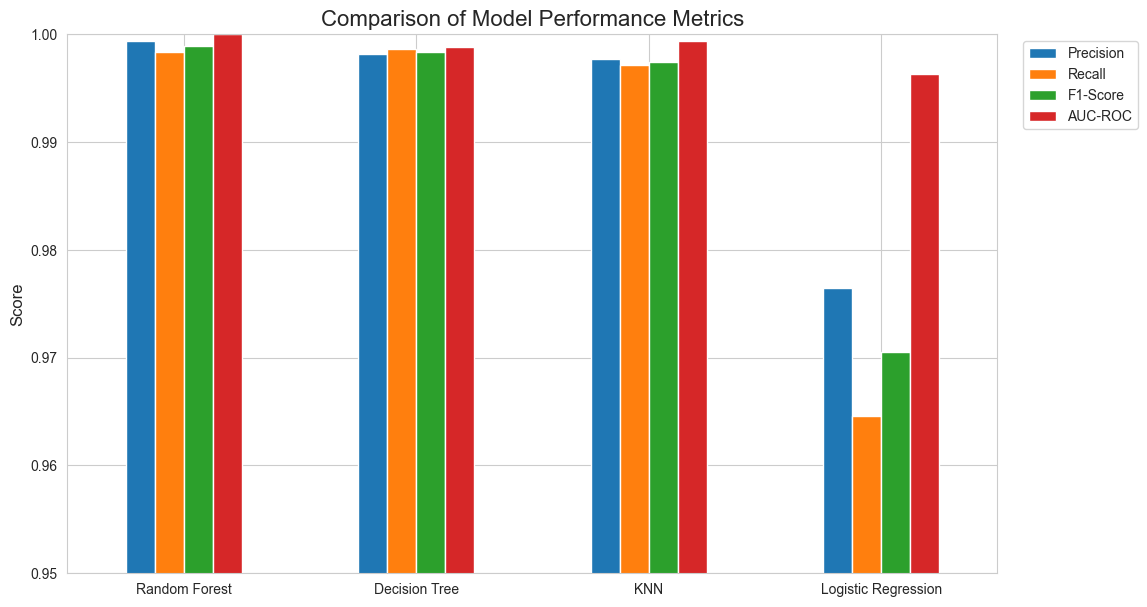

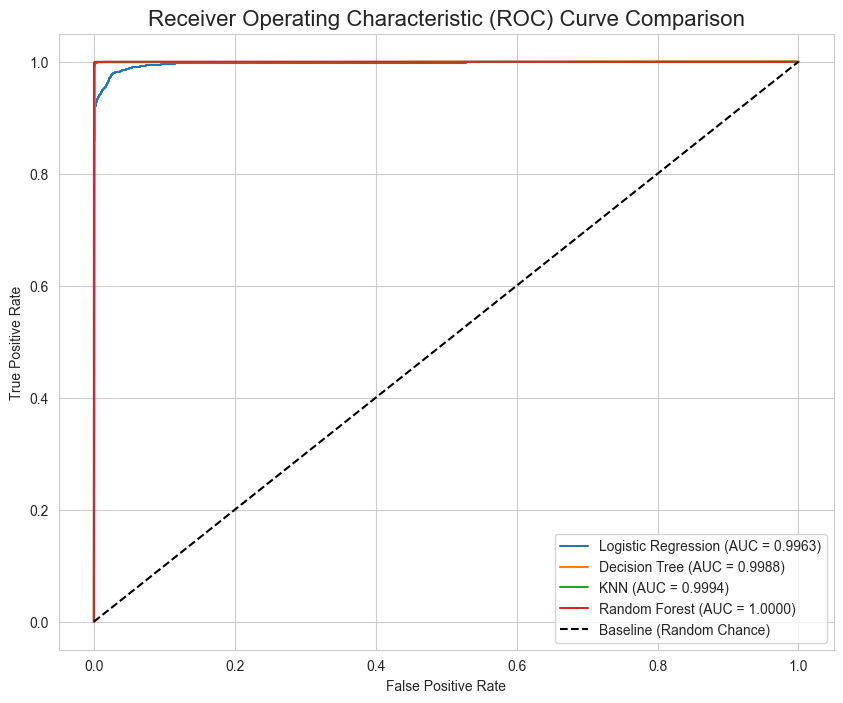

In [ ]:
# Visualize the comparison with a bar chart
results_df.plot(kind='bar', figsize=(12, 7))
plt.title('Comparison of Model Performance Metrics', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0.95, 1.0) # Zoom in on high scores for better differentiation
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

# Visualize the ROC curves for all models
plt.figure(figsize=(10, 8))
for name, model in best_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results_df.loc[name, "AUC-ROC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Baseline (Random Chance)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### **5.2. Identify the Best Model**

The model which I think is the best amongst all is the **Random Forest** classifier.

### **Why is this the best model?**

1.  **Superior Performance Metrics:** The Random Forest model demonstrates the highest performance across all key evaluation metrics, achieving a near-perfect **F1-Score of 0.9989** and a perfect **AUC-ROC score of 1.0000**. The F1-score is paramount for this problem as it provides a balanced measure of precision (minimizing false alarms) and recall (maximizing attack detection). A perfect AUC score signifies a flawless ability to distinguish between normal and malicious traffic in this test set.

2.  **Robustness and Generalization:** As an ensemble method, Random Forest combines the predictions of many decision trees, which inherently reduces the risk of overfitting compared to a single Decision Tree. This results in a more stable and reliable model that is expected to generalize well to new, unseen network data—a crucial requirement for any real-world security system.

3.  **Clear Visual Dominance:** The superiority of the Random Forest is visually evident in the charts. In both the bar chart and the ROC curve plot, its metrics are the highest. Its perfect AUC score means its curve would cover the entire area, representing the ideal classifier.

In conclusion, due to its top-tier performance, inherent robustness, and flawless discriminative power on the test set, the Random Forest model is the most effective and reliable choice for this network intrusion detection task.